In [19]:
import random
from datetime import datetime, timedelta

In [20]:
def generate_random_values_days(start_date, seed=None):
    if seed is not None:
        random.seed(seed)

        hourly_ranges = {
            0 : [(10.8, 11.3), (13.3, 13.6), (15.8, 16), (17.6, 17.7)],
            1 : [(11, 11.3), (13, 13.6), (15, 15.8), (17.5, 17.7)],
            2: [(11, 11.8), (13, 13.6), (14.7, 15), (17.4, 17.7)],
            3: [(11.7, 12), (13, 13.8), (14.7, 15), (17, 17.6)],
            4: [(11.8, 12), (13.6, 13.8), (15, 15.8), (16.3, 17)],
            5: [(11.3, 12), (13.6, 13.8), (15.8, 16), (16.3, 16.4)],
            6: [(10.5, 11.3),(13.7, 14), (15.7, 15.9), (16, 16.2)],  
            7: [(10.5, 12), (14, 15.5), (15.7, 16.2), (16.2, 17.6)],  
            8: [(12, 14.2), (15.5, 17.9), (16.1, 18.3), (17.6, 20.1)],
            9: [(14.2, 15.8), (17.7, 18), (18.3, 19.7), (20, 21.6)],
            10: [(15.8, 17.1), (18, 19.7), (19.7, 20), (21.5, 22)], 
            11: [(17.1, 18), (18.2, 19.5), (19.7, 20.1), (22, 22.2)],  
            12: [(17.6, 18), (18.2, 19.9), (20, 20.3), (22, 22.3)],  
            13: [(17.6, 18), (19.9, 20.1), (19.7, 20.3), (19.9, 23.7)],
            14: [(17.6, 18), (19.7, 20.1), (19.7, 20), (21.9, 22.1)],
            15: [(17.6, 18), (18.4, 19.7), (19, 19.7), (21.8, 22)],
            16: [(14.8, 17.6), (16.2, 18.4), (17, 19), (19, 21.8)],
            17: [(14, 14.3), (16, 16.3), (17, 17.7), (18, 19)],  
            18: [(13.8, 14), (15.8, 16), (16.8, 17), (18, 18.2)],
            19: [(13.8, 14), (15.8, 16), (16.7, 16.9), (18, 18.7)],
            20: [(13.8, 14), (15.6, 16), (16.8, 17), (18.7, 18.9)],
            21: [(13.8, 14), (15.6, 16), (17, 17.5), (19, 19.3)],
            22: [(13.7, 14), (15.9, 16), (16.8, 17.2), (19.1, 19.4)],
            23: [(13.6, 14), (15.9, 16), (17, 17.7), (19.5, 19.7)],  
        }

    random_values = {}
    start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
    end_datetime = start_datetime + timedelta(days=4)

    current_datetime = start_datetime
    while current_datetime < end_datetime:
        day_index = (current_datetime - start_datetime).days
        hour_of_day = current_datetime.hour

        # Get the range for the current hour and day
        min_value, max_value = hourly_ranges[hour_of_day][day_index]

        # Generate a random value within the range
        random_value = round(random.uniform(min_value, max_value), 1)

        # Store the value in the dictionary
        random_values[current_datetime] = random_value

        # Increment time by 10 minutes
        current_datetime += timedelta(minutes=10)

    return random_values


# Generate random value
random_values = generate_random_values_days("2024-11-30", seed=1234567)
for timestamp, value in random_values.items():
    print(f"{timestamp}: {value}")

2024-11-30 00:00:00: 11.3
2024-11-30 00:10:00: 10.9
2024-11-30 00:20:00: 11.1
2024-11-30 00:30:00: 10.9
2024-11-30 00:40:00: 11.3
2024-11-30 00:50:00: 11.1
2024-11-30 01:00:00: 11.0
2024-11-30 01:10:00: 11.2
2024-11-30 01:20:00: 11.2
2024-11-30 01:30:00: 11.2
2024-11-30 01:40:00: 11.2
2024-11-30 01:50:00: 11.1
2024-11-30 02:00:00: 11.8
2024-11-30 02:10:00: 11.6
2024-11-30 02:20:00: 11.5
2024-11-30 02:30:00: 11.4
2024-11-30 02:40:00: 11.2
2024-11-30 02:50:00: 11.3
2024-11-30 03:00:00: 11.8
2024-11-30 03:10:00: 11.9
2024-11-30 03:20:00: 11.9
2024-11-30 03:30:00: 11.9
2024-11-30 03:40:00: 11.8
2024-11-30 03:50:00: 11.9
2024-11-30 04:00:00: 12.0
2024-11-30 04:10:00: 11.8
2024-11-30 04:20:00: 11.9
2024-11-30 04:30:00: 11.9
2024-11-30 04:40:00: 11.9
2024-11-30 04:50:00: 12.0
2024-11-30 05:00:00: 11.7
2024-11-30 05:10:00: 11.9
2024-11-30 05:20:00: 11.3
2024-11-30 05:30:00: 11.6
2024-11-30 05:40:00: 11.6
2024-11-30 05:50:00: 11.4
2024-11-30 06:00:00: 10.9
2024-11-30 06:10:00: 11.1
2024-11-30 0

In [21]:
import pandas as pd
df_10min_hi = pd.DataFrame(list(random_values.items()), columns=["datetime", "10 mins HI"])

df_10min_hi["datetime"] = pd.to_datetime(df_10min_hi["datetime"])

In [22]:
df_10min_hi

,datetime,10 mins HI
0,2024-11-30 00:00:00,11.3
1,2024-11-30 00:10:00,10.9
2,2024-11-30 00:20:00,11.1
3,2024-11-30 00:30:00,10.9
4,2024-11-30 00:40:00,11.3
...,...,...
571,2024-12-03 23:10:00,19.5
572,2024-12-03 23:20:00,19.7
573,2024-12-03 23:30:00,19.7
574,2024-12-03 23:40:00,19.6


In [23]:
# Plot graph to compare with actual graph

# Define the filter range
start_time = "2024-12-03 00:00:00"
end_time = "2024-12-03 23:50:00"

# Filter the DataFrame
filtered_df = df_10min_hi.loc[(df_10min_hi["datetime"] >= start_time) & (df_10min_hi["datetime"] <= end_time)]

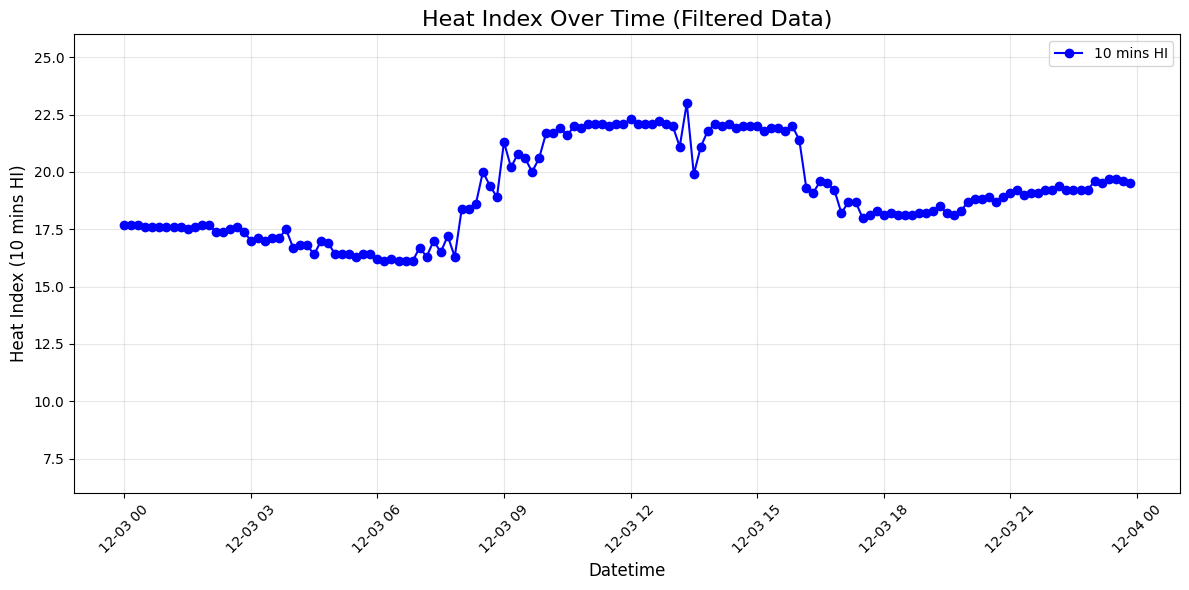

In [24]:
import matplotlib.pyplot as plt

# Plot the line chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(filtered_df["datetime"], filtered_df["10 mins HI"], marker="o", linestyle="-", color="blue", label="10 mins HI")

# Set chart labels and title
plt.title("Heat Index Over Time (Filtered Data)", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Heat Index (10 mins HI)", fontsize=12)

# Fix the y-axis range
plt.ylim(6, 26)

# Rotate x-axis labels and add grid
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
# Save the final DataFrame to a CSV file
path = r'C:\Users\ysk546\Desktop\CUHK_Course\STAT6207 Applied deep learning\Project\df_10mins_hi.csv'
df_10min_hi.to_csv(path, index=False)